# Estymatory największej wiarygodności

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import optimize, stats
from sklearn import datasets

# Przykład 
Program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
# Parametry rozkładu jednostajnego
a, b = -2.0, 4.0  # zakładamy, że chcemy losować z przedziału [-2, 4]

# Parametry rozkładu normalnego
mu, sigma = 1.0, 1.0

# Liczba próbek
N = 10000

# Losowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

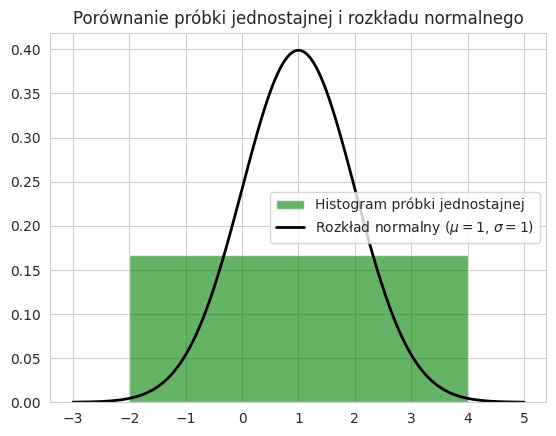

In [3]:
# Punkty, dla których będziemy rysować funkcję gęstości rozkładu normalnego
t = np.linspace(-3, 5, 1000)

# Rysowanie histogramu próbki z rozkładu jednostajnego
plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color="g", label="Histogram próbki jednostajnej")

# Rysowanie funkcji gęstości rozkładu normalnego
plt.plot(t, stats.norm.pdf(t, mu, sigma), "k-", lw=2, label="Rozkład normalny ($\mu=1$, $\sigma=1$)")

# Dodanie legendy i tytułu
plt.legend()
plt.title("Porównanie próbki jednostajnej i rozkładu normalnego")
plt.show()

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

$$
\mu=\frac{1}{n}\sum_{i=1}^n x_i
$$

$$
\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2
$$

In [4]:
a, b = -2., 2.
N = 1000

uniform_data = np.random.uniform(a, b, N)

mu = np.sum(uniform_data) / N
sigma = np.sum((uniform_data - mu) ** 2) / N

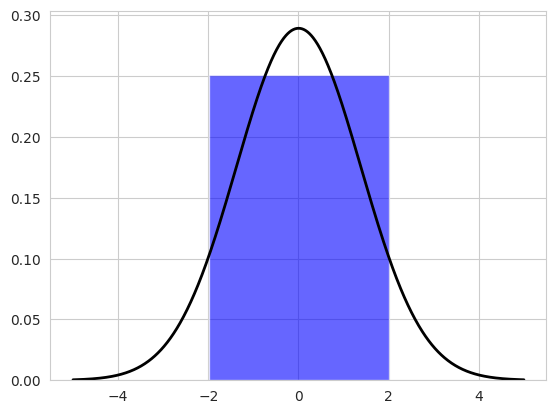

In [7]:
t = np.linspace(-5, 5, 1000)

plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color="b")
plt.plot(t, stats.norm.pdf(t, mu, sigma), "k-", lw=2)
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

In [6]:
N = 1000
a, b = -2.0, 2.0

uniform_data = np.random.uniform(a, b, N)

res = stats.fit(
    stats.norm,
    uniform_data,
)

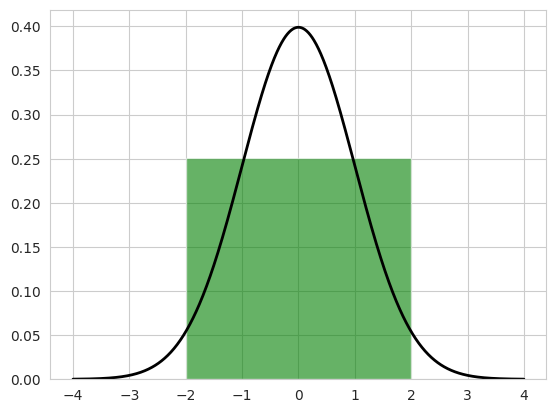

In [7]:
t = np.linspace(-4, 4, 1000)

plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color="g")
plt.plot(t, stats.norm.pdf(t, *res.params), "k-", lw=2)

plt.show()

# Zadanie 3

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [9]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1 / (sigma * (2 * np.pi) ** 0.5) * np.e ** (-((x - mu) ** 2) / (2 * sigma ** 2))


def log_likelihood(x, mu, sigma):
    return np.sum(np.log(Gpdf(x, mu, sigma)))

# Zadanie 4
Policz MLE dla danych z rozkładu jednostajnego i parametrów:

$\mu=0, \sigma=1$

$\mu=0, \sigma=2$

$\mu=1, \sigma=1$

$\mu=0.5, \sigma=0.2$

Dla których wartości wychodzi wynik największy i dlaczego?

In [10]:
N = 1000
a, b = -2.0, 2.0
uniform_data = np.random.uniform(a, b, size=N)

likelihoods = []
for mu, sigma in [(0.0, 1.0), (0.0, 2.0), (1.0, 1.0), (0.5, 0.2)]:
    likelihoods.append((mu, sigma, log_likelihood(uniform_data, mu, sigma)))

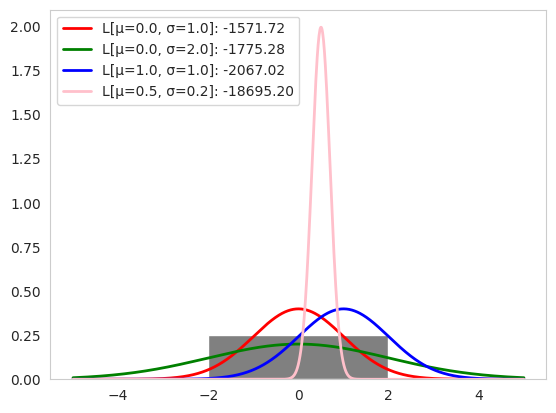

In [11]:
t = np.linspace(-5, 5, 1000)

colors = ['red', 'green', 'blue', 'pink']

for (mu, sigma, ll), color in zip(likelihoods, colors):
    plt.plot(t, Gpdf(t, mu, sigma), lw=2, color=color, label=f"L[μ={mu}, σ={sigma}]: {ll:.2f}")

plt.hist(uniform_data, bins=1, density=True, color="gray")

plt.legend()
plt.grid()
plt.show()

# Przykład
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [12]:
def f(data):
    x, y = data
    return (x + 1) ** 2 + y ** 2


x0 = np.array([3, 5])
res = optimize.fmin_cg(f, x0)
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[-9.99999998e-01  6.72930334e-09]


# Zadanie 5
Zminimalizuj funkcję wiarygodności korzystając z optimize (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [16]:
def opt_norm_loglikelihood(params, data):
    mu, sigma = params
    # otpimize.fmin_cg znajduje minimum funkcji, w kontekscie funkcji wiarygodnosci chcemy znalezc jej maksimum wieec -log_likelihood
    return -log_likelihood(data, mu, sigma)


N = 1000
a, b = -2.0, 2.0
uniform_data = np.random.uniform(a, b, size=N)

x0 = np.array([0, 1])
mu, sigma = optimize.fmin_cg(opt_norm_loglikelihood, x0, args=(uniform_data,))

print(f"L[μ={mu:.2f}, σ={sigma:.2f}]: {log_likelihood(uniform_data, mu, sigma):.2f}")

Optimization terminated successfully.
         Current function value: 1597.054417
         Iterations: 9
         Function evaluations: 64
         Gradient evaluations: 21
L[μ=0.07, σ=1.19]: -1597.05


# Zadanie 7

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [17]:
def split_normal_pdf(x, m, sigma1, sigma2):
    A = 1 / (sigma1 + sigma2) * np.sqrt(2 / np.pi)
    B = np.where(x < m, (x - m) / sigma1, (x - m) / sigma2)
    return A * np.exp(-0.5 * B ** 2)


def split_normal_loglikelihood(x, mu, sigma1, sigma2):
    return np.sum(np.log(split_normal_pdf(x, mu, sigma1, sigma2)))

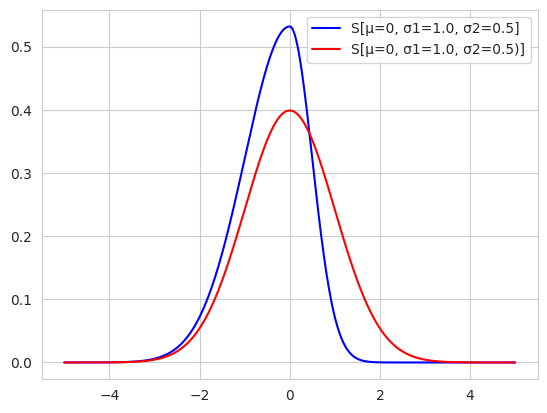

In [19]:
t = np.linspace(-5, 5, 1000)

plt.plot(t, split_normal_pdf(t, 0, 1, 0.5), color = 'blue', label="S[μ=0, σ1=1.0, σ2=0.5]")
plt.plot(t, split_normal_pdf(t, 0, 1, 1.), color = 'red' , label="S[μ=0, σ1=1.0, σ2=0.5)]")

plt.legend()
plt.show()

# Zadanie 8
Zminimalizuj funkcją wiarygodności z Zad. 7 (numerycznie).

In [22]:
def opt_split_normal_loglikelihood(params, data):
    m, sigma1, sigma2 = params
    return -split_normal_loglikelihood(data, m, sigma1, sigma2)


N = 1000
a, b = -2.0, 2.0
uniform_data = np.random.uniform(a, b, size=N)

x0 = np.asarray((0.0, 1.0, 1.0))
m, sigma1, sigma2 = optimize.fmin_cg(opt_split_normal_loglikelihood, x0, args=(uniform_data,))

print(f"L[μ={m:.2f}, σ1={sigma1:.2f}, σ2={sigma2:.2f}]: {split_normal_loglikelihood(uniform_data, m, sigma1, sigma2):.2f}")

Optimization terminated successfully.
         Current function value: 1563.984136
         Iterations: 53
         Function evaluations: 497
         Gradient evaluations: 124
L[μ=-1.70, σ1=0.17, σ2=2.14]: -1563.98


# Zadanie 9
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>california_housing.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [23]:
california_housing = datasets.fetch_california_housing()
data = california_housing.data[:,7]

mu0 = np.mean(data)
sigma0 = np.std(data)
tau0 = np.std(data)

mu_norm, sigma_norm = optimize.minimize(opt_norm_loglikelihood, np.asarray((mu0, sigma0)), args=(data,), method="CG").x
mu_split, sigma1_split, sigma2_split = optimize.minimize(opt_split_normal_loglikelihood, np.asarray((mu0, sigma0, sigma0)), args=(data,), method="Nelder-Mead").x

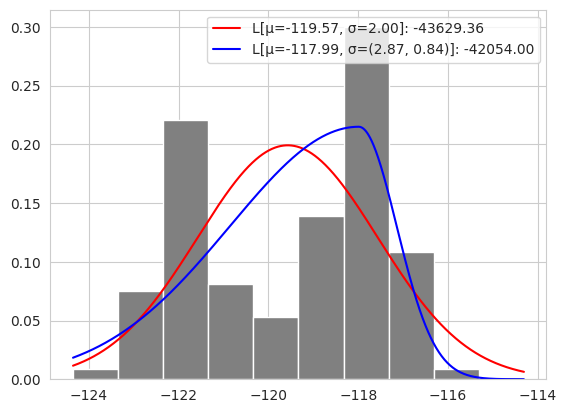

In [24]:
t = np.linspace(min(data), max(data), 1000)

plt.plot(
    t,
    Gpdf(t, mu_norm, sigma_norm),
    color='red',
    label=f"L[μ={mu_norm:.2f}, σ={sigma_norm:.2f}]: {log_likelihood(data, mu_norm, sigma_norm):.2f}",
)
plt.plot(
    t,
    split_normal_pdf(t, mu_split, sigma1_split, sigma2_split),
    color='blue',
    label=f"L[μ={mu_split:.2f}, σ=({sigma1_split:.2f}, {sigma2_split:.2f})]: {split_normal_loglikelihood(data, mu_split, sigma1_split, sigma2_split):.2f}",
)
plt.hist(data, density=True, color="gray")


plt.legend()
plt.show()